# Import libraries 

As a data scientist, you would typically use libraries such as: 
- `pandas` : used to read data into a structured tabular format known as a `DataFrame`. It supports reading data from files, databases and APIs. It allows for operations to be performed on the `DataFrame` before then being written out to another file or database. 
- `statsmodels` : used to train a model and perform forecasting. 
- `scikit-learn` : used to train a model and perform forecasting.  
- And much more..! Depending on what you need to do. 

Go ahead an import these popular libraries into your notebook by running

```python
import pandas as pd  
import statsmodels.api as sm
import matplotlib.pyplot as plt
```

If these libraries do not exist on your computer, you would see a `Module Not Found` error. In that case, go ahead and install these libraries by running: 

```
pip install pandas 
pip install statsmodels
pip install matplotlib
```


In [1]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Reading in data

Let's assume that a Data Engineer has prepared a dataset for you (as per the previous exercises we did), and the dataset is stored in `../resources/superstore.csv`. 

We can read in the data using: 
```python
pd.read_csv("file_path_here")
```

In [2]:
df = pd.read_csv("../resources/superstore.csv")
df.head()

,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Order ID,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Unit Price,Total Sales
0,AA-10315,Alex Avila,Consumer,Round Rock,Texas,United States,78664.0,US,Central,CA-2011-128055,...,Office Supplies,Appliances,Fellowes Advanced Computer Series Surge Protec...,52.980,2,0.0,14.8344,3.17,26.490,56.150
1,AA-10315,Alex Avila,Consumer,Round Rock,Texas,United States,78664.0,US,Central,CA-2011-128055,...,Office Supplies,Binders,GBC DocuBind 200 Manual Binding Machine,673.568,2,0.2,252.5880,54.96,336.784,728.528
2,AA-10315,Alex Avila,Consumer,Round Rock,Texas,United States,78664.0,US,Central,CA-2011-138100,...,Furniture,Furnishings,"Master Caster Door Stop, Large Neon Orange",14.560,2,0.0,6.2608,1.31,7.280,15.870
3,AA-10315,Alex Avila,Consumer,Round Rock,Texas,United States,78664.0,US,Central,CA-2011-138100,...,Office Supplies,Paper,Staples,14.940,3,0.0,7.0218,0.99,4.980,15.930
4,AA-10315,Alex Avila,Consumer,Round Rock,Texas,United States,78664.0,US,Central,CA-2012-121391,...,Office Supplies,Storage,Tenex Personal Project File with Scoop Front D...,26.960,2,0.0,7.0096,5.23,13.480,32.190


In [3]:
df.columns

Index(['Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Order ID', 'Order Date',
       'Ship Date', 'Ship Mode', 'Order Priority', 'Order Item ID',
       'Order Item Number', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping Cost', 'Unit Price', 'Total Sales'],
      dtype='object')

# Feature engineering

As a Data Scientist, you would often have to generate new features (columns) from existing data. 

These new features are used in the building of a machine learning model. 

Create a new date column (feature) so that it can be used in a time series forecasting model. 

In [5]:
df["order_date"] = pd.to_datetime(df["Order Date"]).dt.date.astype(str)
df.head()

,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Order ID,...,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Unit Price,Total Sales,order_date
0,AA-10315,Alex Avila,Consumer,Round Rock,Texas,United States,78664.0,US,Central,CA-2011-128055,...,Appliances,Fellowes Advanced Computer Series Surge Protec...,52.980,2,0.0,14.8344,3.17,26.490,56.150,2011-03-31
1,AA-10315,Alex Avila,Consumer,Round Rock,Texas,United States,78664.0,US,Central,CA-2011-128055,...,Binders,GBC DocuBind 200 Manual Binding Machine,673.568,2,0.2,252.5880,54.96,336.784,728.528,2011-03-31
2,AA-10315,Alex Avila,Consumer,Round Rock,Texas,United States,78664.0,US,Central,CA-2011-138100,...,Furnishings,"Master Caster Door Stop, Large Neon Orange",14.560,2,0.0,6.2608,1.31,7.280,15.870,2011-09-15
3,AA-10315,Alex Avila,Consumer,Round Rock,Texas,United States,78664.0,US,Central,CA-2011-138100,...,Paper,Staples,14.940,3,0.0,7.0218,0.99,4.980,15.930,2011-09-15
4,AA-10315,Alex Avila,Consumer,Round Rock,Texas,United States,78664.0,US,Central,CA-2012-121391,...,Storage,Tenex Personal Project File with Scoop Front D...,26.960,2,0.0,7.0096,5.23,13.480,32.190,2012-04-10


Prepare your dataset to be used in a time series forecasting model by grouping your data by `order_date` and summing up `Total Sales`.  

In [7]:
sales_df = pd.DataFrame(df.groupby(by=['order_date']).sum()['Total Sales'])
sales_df.head()

,Total Sales
order_date,
2011-01-01,873.2330
2011-01-02,2284.9800
2011-01-03,13893.9263
2011-01-04,2959.2910
2011-01-06,12690.0527


# Train model 


Use use SARIMAX, a time series forecasting method. 

```python
model = sm.tsa.statespace.SARIMAX(df,order=(1, 0, 0), seasonal_order=(1, 1, 1, 12))
```

Where: 
- `df`: your DataFrame with the date set as the index and a column for the values 
- `order`: the (p,d,q) order of the model. 
- `seasonal_order`: the (P,D,Q,s) order of the seasonal component of the model 

In [8]:
# fit a time series model 
import warnings
warnings.filterwarnings('ignore')

model = sm.tsa.statespace.SARIMAX(sales_df,order=(1, 0, 0), seasonal_order=(1, 1, 1, 12))
result = model.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03079D+01    |proj g|=  9.10230D-02

At iterate    5    f=  1.02665D+01    |proj g|=  2.88530D-03

At iterate   10    f=  1.02662D+01    |proj g|=  5.08846D-05

At iterate   15    f=  1.02662D+01    |proj g|=  2.54210D-03

At iterate   20    f=  1.02647D+01    |proj g|=  1.03233D-02

At iterate   25    f=  1.02064D+01    |proj g|=  5.12339D-02

At iterate   30    f=  1.02041D+01    |proj g|=  4.03671D-04

At iterate   35    f=  1.01830D+01    |proj g|=  6.88587D-02

At iterate   40    f=  1.01721D+01    |proj g|=  3.52816D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

# Perform prediction

Taking the trained model, you can now perform predictions against data it has seen before to see what the model would've predicted. 

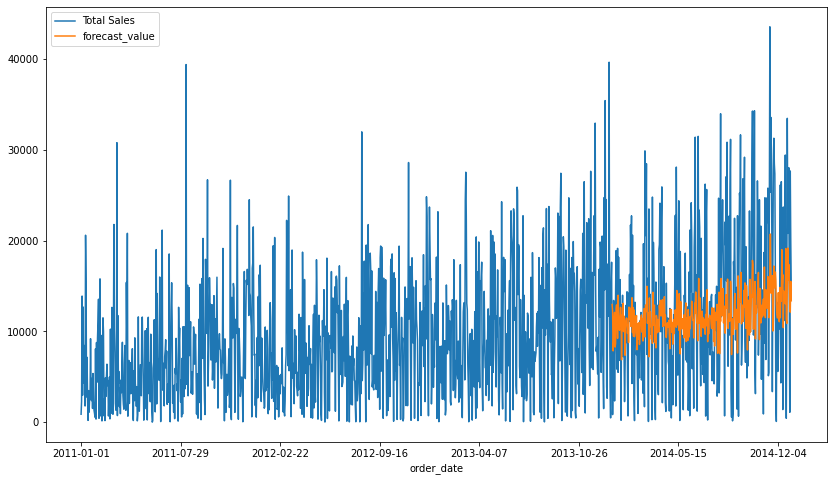

In [20]:
sales_df['forecast_value']= result.predict(start='2014-01-01', end='2014-12-31', dynamic=False)

# visualization for the same
sales_df.plot(figsize=(14, 8))
plt.show()

# Perform forecast 

Taking the trained model, you can now perform forecasts for data the model has not seen before (also known as an out-of-sample forecast). 

In [32]:
sales_df.index.get_loc("2014-12-31")

1427

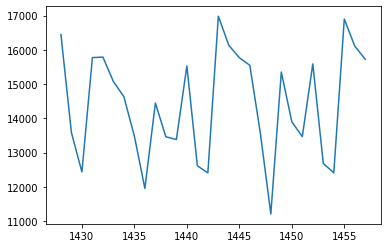

In [27]:
# forecast 30 days from the last recorded date in the dataset 
plt.plot(result.forecast(steps=30))
plt.show()